**Table of contents**<a id='toc0_'></a>    
- [Set Model Version](#toc1_1_)    
      - [Check NAN](#toc1_1_1_1_)    
      - [Assign Target and Split](#toc1_1_1_2_)    
      - [Split](#toc1_1_1_3_)    
    - [Preprocessing](#toc1_1_2_)    
    - [Function Additions](#toc1_1_3_)    
- [Run Vanilla Decision Tree](#toc2_)    
    - [Run Vanilla Models](#toc2_1_1_)    
    - [Model 1: XGBoost](#toc2_1_2_)    
    - [Extra Trees](#toc2_1_3_)    
      - [Best Model](#toc2_1_3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
import time
import graphviz
import requests     
import shutil       
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import requests
import json
import xgboost
from xgboost import XGBClassifier
from random import randint
import  random
import os
from cmath import nan
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import fbeta_score
# import winsound
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pprint
import pickle
from cmath import nan
import plotly
import plotly.express as px
from plotly import graph_objects as go
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import pydot
from IPython.display import Image, display
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree
from sklearn.ensemble import GradientBoostingClassifier
# import lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# import kmeans
from sklearn.cluster import KMeans


# # Sound Variables
# sound_file = "data/audio/Jobs Done.wav"

# def play_jobs_done():
#     winsound.PlaySound(sound_file, winsound.SND_FILENAME)


# bad_sound_file = 'data/audio/Danger Will Robinson.wav'

# def play_danger():
#     winsound.PlaySound(bad_sound_file, winsound.SND_FILENAME)



## <a id='toc1_1_'></a>[Set Model Version](#toc0_)

If you want to run BRAND NEW Models, set a new model version, which will create a new folder and save the models to. 

In [93]:
modeling_version = 'v1'

home_folder = '/Users/travisroyce/Library/CloudStorage/OneDrive-Personal/Data Science/Personal_Projects/Sports/UFC_Prediction_V2'

model_folder = home_folder + '/models/middleweight/' + modeling_version + '/'
print(model_folder)

/Users/travisroyce/Library/CloudStorage/OneDrive-Personal/Data Science/Personal_Projects/Sports/UFC_Prediction_V2/models/middleweight/v1/


In [94]:
if not os.path.exists(model_folder):
    print('Creating Folder')
    os.makedirs(model_folder)

In [95]:
# set home folder
os.chdir(home_folder)

In [96]:
# load data 
df  = pd.read_csv('data/final/aggregates/Double_Fights_DF_V20.csv') 
df.head(3)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,B_Initial_Martial_Arts_Cats,Ape_Index_Dif,Leg_Index_Dif,Leg_to_Wing_Index_Dif,A_Days_Since_Last_Fight,B_Days_Since_Last_Fight,Days_Since_Last_Fight_Dif,Fighter_A_Odds_Implied_Prob,Fighter_B_Odds_Implied_Prob,Fighter_Odds_Implied_Prob_Dif
0,0,Rick Story,Martin Kampmann,0.0,0.0,61.0,170.0,38.0,147.0,0.35,...,Muay Thai-BJJ,-0.013492,0.001984,0.009326,NaN,NaN,NaN,52.38,50.00,2.38
1,1,Enrique Barzola,Kyle Bochniak,0.0,0.0,55.0,165.0,41.0,141.0,0.33,...,BJJ-Muay Thai,0.000000,-0.037313,-0.035714,NaN,NaN,NaN,46.51,57.45,-10.94
2,2,Belal Muhammad,Takashi Sato,0.0,0.0,49.0,106.0,29.0,89.0,0.46,...,Karate-Judo,-0.028773,-0.022334,-0.006088,NaN,NaN,NaN,79.59,23.81,55.78


In [97]:
# check weight class counts
df['fight_weightclass'].value_counts()

Lightweight              1582
Welterweight             1428
Middleweight             1096
Featherweight             888
Bantamweight              770
Light Heavyweight         676
Heavyweight               668
Flyweight                 396
Women's Strawweight       298
Women's Bantamweight      250
Women's Flyweight         216
Catch Weight               74
Women's Featherweight      24
Name: fight_weightclass, dtype: int64

In [98]:
# filter by weightclass
df = df[df['fight_weightclass'] == 'Middleweight']

In [99]:
# check for date column
date_cols = [col for col in df.columns if 'date' in col]
date_cols

['date', 'datetime', 'date_formatted']

In [100]:
# search for Rolling_Kd columns
rolling_kd = [col for col in df.columns if 'Rolling_Kd' in col]

In [101]:
unnamed = [n for n in df.columns if 'Unnamed' in n]
df.drop(columns=unnamed, inplace=True)
#Identify columns with missing values
nothere = df.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]

In [102]:
# get cols with InFightData in the name
InFightData = [n for n in df.columns if 'InFightData' in n]

In [103]:
# drop them from df
df.drop(columns=InFightData, inplace=True)

In [104]:
# drop specific categorical columns with too many values, we are using clusters instead
df.drop(['A_Affiliation', 'B_Affiliation', 'A_Fighting_Out_Of', 'B_Fighting_Out_Of', 'A_Previous_Promotion', 'B_Previous_Promotion'], axis=1, inplace=True)

In [105]:
also_drop = ['A_Martial_Art_2', 'B_Martial_Art_2', 'A_Martial_Art_3', 'B_Martial_Art_3',
             'A_Martial_Art_1_Category', 'A_Martial_Art_2_Category', 'A_Martial_Art_3_Category',
             'B_Martial_Art_1_Category', 'B_Martial_Art_2_Category', 'B_Martial_Art_3_Category']
df.drop(columns=also_drop, inplace=True)



In [106]:
# drop all median columns
df.drop(columns=[n for n in df.columns if 'median' in n], inplace=True)

# drop all std columns
df.drop(columns=[n for n in df.columns if 'std' in n], inplace=True)

# drop all Std columns
df.drop(columns=[n for n in df.columns if 'Std' in n], inplace=True)


Drop In-Fight Metrics

In [107]:
to_drop= ['A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes_land',
       'A_Total_Strikes_att', 'B_Total_Strikes_land', 'B_Total_Strikes_att',
       'A_Total_Strikes_percent', 'B_Total_Strikes_percent',
       'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land',
       'B_Takedowns_att', 'A_Takedown_percent', 'B_Takedown_percent',
       'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land',
       'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min',
       'A_Ctrl_time_sec', 'B_Ctrl_time_min', 'B_Ctrl_time_sec',
       'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details','A_Head_Strikes_land',
       'A_Head_Strikes_att', 'B_Head_Strikes_land', 'B_Head_Strikes_att',
       'A_Head_Strikes_percent', 'B_Head_Strikes_percent',
       'A_Body_Strikes_land', 'A_Body_Strikes_att', 'B_Body_Strikes_land',
       'B_Body_Strikes_att', 'B_Body_Strikes_percent', 'A_Leg_Strikes_land', 'A_Leg_Strikes_att',
       'B_Leg_Strikes_land', 'B_Leg_Strikes_att', 'A_Leg_Strikes_percent',
       'B_Leg_Strikes_percent', 'A_Distance_Strikes_land',
       'A_Distance_Strikes_att', 'B_Distance_Strikes_land',
       'B_Distance_Strikes_att', 'A_Distance_Strikes_percent',
       'B_Distance_Strikes_percent', 'A_Clinch_Strikes_land',
       'A_Clinch_Strikes_att', 'B_Clinch_Strikes_land', 'B_Clinch_Strikes_att',
       'A_Clinch_Strikes_percent', 'B_Clinch_Strikes_percent',
       'A_Ground_Strikes_land', 'A_Ground_Strikes_att',
       'B_Ground_Strikes_land', 'B_Ground_Strikes_att',
       'A_Ground_Strikes_percent', 'B_Ground_Strikes_percent',  'A_Body_Strikes_percent']

df.drop(columns=to_drop, inplace=True)

In [108]:
# drop all Dif Rows (In-Fight Differentials)
dif_rows = ['Dif_Kd', 'Dif_Sig_strike_land', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent',
 'Dif_Total_Strikes_land', 'Dif_Total_Strikes_att', 'Dif_Total_Strikes_percent', 'Dif_Takedowns_land',
 'Dif_Takedowns_att', 'Dif_Takedown_percent', 'Dif_Sub_Attempts_land', 'Dif_Sub_Attempts_att',
 'Dif_Rev', 'Dif_Ctrl_time_min', 'Dif_Ctrl_time_sec', 'Dif_Ctrl_time_tot', 'Dif_Head_Strikes_land',
 'Dif_Head_Strikes_att', 'Dif_Head_Strikes_percent', 'Dif_Body_Strikes_land', 'Dif_Body_Strikes_att',
 'Dif_Body_Strikes_percent', 'Dif_Leg_Strikes_land', 'Dif_Leg_Strikes_att', 'Dif_Leg_Strikes_percent',
 'Dif_Distance_Strikes_land', 'Dif_Distance_Strikes_att', 'Dif_Distance_Strikes_percent', 'Dif_Clinch_Strikes_land',
 'Dif_Clinch_Strikes_att', 'Dif_Clinch_Strikes_percent', 'Dif_Ground_Strikes_land','Dif_Ground_Strikes_att',
 'Dif_Ground_Strikes_percent']

df.drop(columns=dif_rows, inplace=True)

In [109]:
# drop instructor columns
instructor_cols = [col for col in  df.columns if 'Instructor' in col]

df.drop(columns=instructor_cols, inplace=True)

In [110]:
# drop topdown columns
topdown_cols = [col for col in  df.columns if 'topdown' in col]
df.drop(columns=topdown_cols, inplace=True)

# drop Year Started Columns
year_started_cols = [col for col in  df.columns if 'Year_Started' in col]
df.drop(columns=year_started_cols, inplace=True)

# Drop UFC Wins Total and UFC Losses Totals
df.drop(columns=['A_UFC_Wins_Total', 'A_UFC_Losses_Total', 'B_UFC_Wins_Total', 'B_UFC_Losses_Total'], inplace=True)

# Drop all Wins_Total and Losses_Total columns
df.drop(columns=[col for col in df.columns if 'Wins_Total' in col], inplace=True)
df.drop(columns=[col for col in df.columns if 'Losses_Total' in col], inplace=True)

In [111]:
# check 'per_round' columns
per_round = [n for n in df.columns if 'per_round' in n]

In [112]:
# check rolling columns
rolling = [n for n in df.columns if 'Rolling' in n]
rolling_not_per_round = [n for n in rolling if 'per_round' not in n]

rolling2 = [n for n in df.columns if 'rolling' in n]
rolling2_not_per_round = [n for n in rolling2 if 'per_round' not in n]

rolling2_not_percent = [n for n in rolling2_not_per_round if 'percent' not in n]


# drop rolling_not_per_round columns
df.drop(columns=rolling2_not_percent, inplace=True)

In [113]:
# drop others
to_drop = ['event_title','event_url','date', 'fight_id', 'Fighter_A', 'Fighter_B', 'datetime', 'date_formatted',
            'Winner', 'event_code', 'A_Typical_Weightclass', 'B_Typical_Weightclass', 'final_round_seconds' ] 

df.drop(columns=to_drop, inplace=True)

In [114]:
# we already have other columns that contain this information
to_drop = ['Fighter_A_Odds', 'Fighter_B_Odds', 'Fighter_B_Odds_Change', 'favorite?']
df.drop(columns=to_drop, inplace=True)

In [115]:
# # find Opp_Avg columns
# opp_avg = [n for n in df.columns if 'Opp_Avg' in n]
# # drop them
# df.drop(columns=opp_avg, inplace=True)

In [116]:
# get rolling NON per-round cols
rolling = [n for n in df.columns if 'Rolling' in n]
rolling_not_per_round = [n for n in rolling if 'per_round' not in n]
rolling_not_per_round_not_percent = [n for n in rolling_not_per_round if 'percent' not in n]
# drop them
df.drop(columns=rolling_not_per_round_not_percent, inplace=True)

In [117]:
# get percent per round
percent_cols = [n for n in df.columns if 'percent' in n]
percent_cols_per_round = [n for n in percent_cols if 'per_round' in n]
# drop them
df.drop(columns=percent_cols_per_round, inplace=True)

In [118]:
# drop if column has _NA in it
df.drop(columns=[n for n in df.columns if '_NA' in n], inplace=True)

In [119]:
# drop 
to_drop= ['A_Initial_Martial_Arts_Cats','B_Initial_Martial_Arts_Cats']

df.drop(columns=to_drop, inplace=True)

In [120]:
# drop Dif_Odds
df.drop(columns=['Dif_Odds'], inplace=True)

### Fix Feature Names

In [121]:
current_cols = df.columns.to_list()

In [122]:
def rename_columns(columns):
    new_columns = []
    for col in columns:
        if "Rolling_" in col:
            col = col.replace("Rolling_", "")
        if "percent_mean" in col:
            col = col.replace("percent_mean", "Rate")
        if "mean_per_round" in col:
            col = col.replace("mean_per_round", "RatePR")
        if "Opp" in col:
            col = col.replace("Opp", "Opponent")
        col = col.replace("_", " ")
        new_columns.append(col)
    return new_columns

# Assuming df is your dataframe
df.columns = rename_columns(df.columns)

#### <a id='toc1_1_1_1_'></a>[Check NAN](#toc0_)

In [123]:
# Check NAN
missing = df.isna().sum()
missing = pd.DataFrame(missing)
missing = missing.loc[missing[0] > 0]
missing

,0
A Kd RatePR,101
A Takedowns land RatePR,36
A Takedowns att RatePR,23
A Sub Attempts land RatePR,91
A Sub Attempts att RatePR,199
...,...
B Previous Promotion Decision Loss Percent,363
B Affiliation Cluster,1
A Days Since Last Fight,189
B Days Since Last Fight,212


In [124]:
# replace NAN with 0
df.fillna(0, inplace=True)

In [125]:
# replace and INF with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

In [126]:
all_cols = df.columns.to_list()

In [127]:
# find weightclass columns
weightclass = [n for n in all_cols if 'Weightclass' in n]
weightclass

['A Fight in Typical Weightclass', 'B Fight in Typical Weightclass']

In [128]:
# check Winner column
#df['Winner'].value_counts()

In [129]:
#df.drop(columns=in_fight_cols, inplace=True)
#df.drop(columns=in_fight_difs, inplace=True)
colz = list(df.columns)
# get favorite
#df['favorite?'] = np.where(df['Fighter_A_Odds_obf'] < 0, 1, 0)

In [130]:
# check value counts
df['win?'].value_counts()

1    548
0    548
Name: win?, dtype: int64

#### <a id='toc1_1_1_2_'></a>[Assign Target and Split](#toc0_)

In [131]:
target_name = "win?"
y = df[target_name]
X = df.drop(columns=[target_name])

# Scoring Metric
class_metric = 'accuracy'

In [132]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

categorical_columns

['fight weightclass', 'A Martial Art 1', 'B Martial Art 1']

In [133]:
# append affiliaiton columns
affiliation_cols = [col for col in X.columns if 'Cluster' in col]
categorical_columns.extend(affiliation_cols)
categorical_columns

['fight weightclass',
 'A Martial Art 1',
 'B Martial Art 1',
 'A Affiliation Cluster',
 'B Affiliation Cluster',
 'A Fighting Out Of Cluster',
 'B Fighting Out Of Cluster',
 'A Previous Promotion Cluster',
 'B Previous Promotion Cluster']

In [134]:
# drop affiliation columns from numerical
numerical_columns.remove('A Fighting Out Of Cluster')
numerical_columns.remove('B Fighting Out Of Cluster')

numerical_columns.remove('A Previous Promotion Cluster')
numerical_columns.remove('B Previous Promotion Cluster')

In [135]:
# make sure categorical_columns are all strings
for col in categorical_columns:
    X[col] = X[col].astype(str)


Affiliation and Fighting_Out_Of columns are both categorical 

In [136]:
col_list = X.columns.to_list()

#### <a id='toc1_1_1_3_'></a>[Split](#toc0_)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [138]:
catcols = []

for col in categorical_columns:
    ind = col_list.index(col)
    catcols.append(ind)

catcols

[110, 310, 311, 357, 358, 359, 360, 361, 362]

In [139]:
cont_cols_index = [n for n in range(len(X_train.columns)) if n not in catcols]

In [140]:
# To get the column names from onehotencoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=None)
checker = ohe.fit_transform(X_train[categorical_columns])

# Use get_feature_names_out instead of get_feature_names
feature_names_categorical = ohe.get_feature_names_out(input_features=categorical_columns)

Categorical Feature Names

In [141]:
fnc = list(feature_names_categorical)
print(len(fnc))

63


In [142]:
# numerical columns
feature_names_numerical = X_train.columns[cont_cols_index]
fnn = list(feature_names_numerical)
print(len(fnn))

363


In [143]:
all_initial_cats = fnn + fnc

### <a id='toc1_1_2_'></a>[Preprocessing](#toc0_)

In [144]:
# pipeline for categorical data
cat_preprocessing = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)
# pipeline for numerical data
num_preprocessing = make_pipeline(StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, cont_cols_index), ("cat", cat_preprocessing, catcols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...]),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [110, 310, 311, 357, 358, 359, 360, 361,
                                  362])])

### <a id='toc1_1_3_'></a>[Function Additions](#toc0_)

In [145]:
def save_result(cv_mean_accuracy, cv_std_accuracy, model_name):
    # Define function to save training result

    # Access global variable model_summary2
    global model_summary2 

    # Create a new row with model name, mean accuracy and standard deviation accuracy
    row = [(model_name, cv_mean_accuracy, cv_std_accuracy)]

    # Create a new dataframe with the row data and column names
    dfcols2 = ['Model_Name', 'Cv_Mean_Accuracy', 'Cv_Std_Accuracy']
    res = pd.DataFrame(columns = dfcols2, data = row)

    # Concatenate the existing model summary dataframe and the new result dataframe
    yeep = [model_summary2, res]
    model_summary2 = pd.concat(yeep)

    # Sort the dataframe by mean accuracy in descending order and drop any duplicates
    model_summary2 = model_summary2.sort_values('Cv_Mean_Accuracy', ascending = False)
    model_summary2 = model_summary2.drop_duplicates()

    # Return the updated model summary dataframe rounded to 3 decimal places
    return model_summary2.round(3)

In [146]:
def run_model(model, model_name):
    """
    # This function runs a machine learning model, produces a confusion matrix, and saves the result
    # It takes two parameters: the machine learning model and its name

    """

    # Fits the model with the training data
    model.fit(X_train, y_train)

    # Obtains the model's predictions using the test data
    model_prediction = model.predict(X_test)

    # Generates a confusion matrix to evaluate the model's performance
    cf_matrix = confusion_matrix(y_test, model_prediction)

    # Saves the confusion matrix with the model's name
    save_result(cf_matrix, model_name)

    # Creates a visualization of the confusion matrix for easy interpretation
    cf = make_confusion_matrix(cf_matrix)

    # Returns a summary of the model's performance
    return model_summary

In [147]:
dfcols2 = ['Model_Name', 'Cv_Mean_Accuracy', 'Cv_Std_Accuracy']
# Create a dataframe to store the model summary
model_summary2 = pd.DataFrame(columns=dfcols2)

In [148]:
def create_fullpipe(preprocessing, model, model_name):
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', model)])
    fullpipe.fit(X_train, y_train)
    # cross validation
    cv = cross_val_score(fullpipe, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(fullpipe, open(model_folder + f'{model_name}.pkl', 'wb'))
    return res

In [149]:
# Function cross validates a model and saves the result and a pickle file
def score_and_save(model, model_name):
    # Cross validate model scores
    cv = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    # save result
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(model, open(model_folder + model_name +'.pkl', 'wb'))
    # make confusion matrix
    return res

In [150]:
def gridsearch_results(grid_clf, param_name,
                          num_results=5,
                          graph=True,
                          display_all_params=False,
                          ):
    """
    Visualizes the results of a grid search performed using scikit-learn's GridSearchCV.
    Used to perform sensitivity analysis of hyperparameters.

    Parameters:
    - grid_clf: GridSearchCV object (fitted)
    - param_name: str, the name of the hyperparameter to be plotted
    - num_results: int, number of top results to display in tabular form (default: 15)
    - graph: bool, whether to display a plot (default: True)
    - display_all_params: bool, whether to display all hyperparameters of the best estimator (default: True)
    """
    
    if not isinstance(grid_clf, GridSearchCV):
        raise ValueError("grid_clf must be an instance of GridSearchCV.")
    
    if not hasattr(grid_clf, 'cv_results_'):
        raise ValueError("GridSearchCV object must be fitted with data.")
    
    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    if param_name not in grid_clf.param_grid:
        raise ValueError(f"{param_name} not found in hyperparameters used in the grid search.")

    print(f"best parameters: {clf_params}")
    print(f"best score:      {clf_score:0.5f} (+/-{clf_stdev:0.5f})")
    
    if display_all_params:
        pprint.pprint(clf.get_params())

    # pick out the best results
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    new_param = 'param_' + param_name
    cv_results[new_param] = pd.Series(cv_results[new_param]).replace({np.log2(np.e): 'log2', np.sqrt(np.e): 'sqrt'})

    best_row = scores_df.iloc[0, :]
    best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row[new_param]

    # display the top 'num_results' results
    top_results =pd.DataFrame(cv_results).sort_values(by='rank_test_score').head(num_results)

    # PLOT
    # Convert the hyperparameter values to strings
    scores_df[new_param] = scores_df[new_param].astype(str)
    scores_df = scores_df.sort_values(by=new_param)

    means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df[new_param]

    # Get the index of the best hyperparameter value
    best_param = str(best_param)  # Ensure best_param is a string for comparison
    best_param_index = scores_df[new_param].eq(best_param).idxmax()


    # plot
    if graph:
        fig, ax = plt.subplots(figsize=(8, 4))
        try:
            ax.errorbar(range(len(params)), means, yerr=stds)  # Use index instead of actual values
            ax.set_xticks(range(len(params)))  # Set x-axis labels to the hyperparameter values
            ax.set_xticklabels(params, rotation=45, ha='right')  # every other x-tick
            
            ax.axhline(y=best_mean + best_stdev, color='red')
            ax.axhline(y=best_mean - best_stdev, color='red')
            ax.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            ax.set_title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            ax.set_xlabel(param_name)
            ax.set_ylabel('Score')
            # make y-axis ticks every 5 ticks
            ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
            plt.show()
        except TypeError:
            ax.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            ax.set_title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            ax.set_xlabel(param_name)
            ax.set_ylabel('Score')
            plt.show()

    return top_results, fig

# <a id='toc2_'></a>[Run Vanilla Decision Tree](#toc0_)
Decion trees are good places to start when building a simple model to improve on. We might be able to learn something from it. 

### <a id='toc2_1_1_'></a>[Run Vanilla Models](#toc0_)

In [151]:
create_fullpipe(preprocessing, LogisticRegression(), 'Logistic_Regression')
create_fullpipe(preprocessing, RandomForestClassifier(), 'Random_Forest')
create_fullpipe(preprocessing, DecisionTreeClassifier(), 'Decision_Tree')
create_fullpipe(preprocessing, BaggingClassifier(), 'Bagged_Trees')
create_fullpipe(preprocessing, ExtraTreesClassifier(), 'Extra_Trees')
create_fullpipe(preprocessing, KNeighborsClassifier(), 'K_Neighbors')
create_fullpipe(preprocessing, XGBClassifier(eval_metric = 'logloss'), 'XGBoost')
create_fullpipe(preprocessing, GradientBoostingClassifier(), 'Gradient_Boosting')
create_fullpipe(preprocessing, LinearDiscriminantAnalysis(), 'LDA')


,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,Random_Forest,0.661,0.022
0,Extra_Trees,0.650,0.032
0,Logistic_Regression,0.646,0.006
0,XGBoost,0.642,0.008
0,Bagged_Trees,0.624,0.020
0,Gradient_Boosting,0.624,0.020
0,LDA,0.588,0.037
0,Decision_Tree,0.562,0.047
0,K_Neighbors,0.533,0.055


Simple Decision Tree

First I want to see a simple decision tree, optimized with GridSearchCV.

In [152]:
# load decision tree classifier from pickle
decision_tree = pickle.load(open(model_folder+'Decision_Tree.pkl', 'rb'))

# check if Decision Tree Grid Search already exists
if os.path.exists(model_folder + 'Decision_Tree_Gridsearched.pkl'):
    # print the path + exists
    print(model_folder + 'Decision_Tree_Gridsearched.pkl exists')
    # load decision tree grid search from pickle
    decision_tree = pickle.load(open(model_folder + 'Decision_Tree_Gridsearched.pkl', 'rb'))
    # run through test and save
    final_decision_tree =score_and_save(decision_tree, 'Decision_Tree_Gridsearched')
    best_pipeline = decision_tree
    print(final_decision_tree)


else:
    # print the path + does not exist
    print(model_folder + 'Decision_Tree_Gridsearched.pkl does not exist')
    # Create a dictionary of hyperparameters to search
    param_grid = {
        "model__max_depth": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 50],
        "model__min_samples_split": [.01, .05, .1, .2, .005],
        "model__min_samples_leaf": [.01, .05, .1, .2, .3, .4],
        "model__criterion": ["gini" , "entropy"],
        "model__max_features": [None, "auto", "sqrt", "log2", .6, .7, .8, .9],
    }

    # Create a gridsearch of the decision tree, using 3-fold cross validation,
    # search across the specified hyperparameters
    # Use all available cores
    grid_search = GridSearchCV(
        decision_tree, param_grid, cv=3, scoring="accuracy", verbose=3
    )

    # Fit the gridsearch to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score found by the gridsearch
    best_parameters = grid_search.best_params_

    # get the whole gridsearch results
    gs_results = grid_search.cv_results_
    gs_results_df = pd.DataFrame(grid_search.cv_results_)
    gs_results_df.head()
    best_estimator = grid_search.best_estimator_
    best_pipeline = best_estimator

    final_decision_tree = score_and_save(best_estimator, 'Decision_Tree_Gridsearched')
    print(final_decision_tree)


/Users/travisroyce/Library/CloudStorage/OneDrive-Personal/Data Science/Personal_Projects/Sports/UFC_Prediction_V2/models/middleweight/v1/Decision_Tree_Gridsearched.pkl exists
                   Model_Name  Cv_Mean_Accuracy  Cv_Std_Accuracy
0               Random_Forest             0.661            0.022
0                 Extra_Trees             0.650            0.032
0         Logistic_Regression             0.646            0.006
0                     XGBoost             0.642            0.008
0                Bagged_Trees             0.624            0.020
0           Gradient_Boosting             0.624            0.020
0  Decision_Tree_Gridsearched             0.606            0.103
0                         LDA             0.588            0.037
0               Decision_Tree             0.562            0.047
0                 K_Neighbors             0.533            0.055


In [153]:
best_parameters

{'model__criterion': 'gini',
 'model__max_depth': 13,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 0.05,
 'model__min_samples_split': 0.2}

In [154]:
best_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [110, 310, 311, 357, 358, 359,
                                                   360, 361, 362])])),
                ('model',
                 DecisionTreeClassifier(max_depth=13, max_features='auto',
                                        min_samples_leaf=0.05,
                                        min_samples_split=0.2))])

In [155]:
final_decision_tree

,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,Random_Forest,0.661,0.022
0,Extra_Trees,0.650,0.032
0,Logistic_Regression,0.646,0.006
0,XGBoost,0.642,0.008
0,Bagged_Trees,0.624,0.020
0,Gradient_Boosting,0.624,0.020
0,Decision_Tree_Gridsearched,0.606,0.103
0,LDA,0.588,0.037
0,Decision_Tree,0.562,0.047
0,K_Neighbors,0.533,0.055


In [156]:

# Access the decision tree model from the pipeline
decision_tree_model = best_pipeline.named_steps['model']

# Get the numerical column names
numerical_feature_names = numerical_columns

# Get the one-hot-encoded categorical column names
categorical_feature_names = feature_names_categorical

# Combine numerical and one-hot-encoded categorical column names
feature_names = numerical_feature_names + list(categorical_feature_names)

# Get the unique class names (sorted) and convert them to strings
class_names = sorted(y.unique().astype(str))  # Convert class names to strings

# Visualize the decision tree with proper labels
plt.figure(figsize=(15, 10), dpi=1000)
plot_tree(decision_tree_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

Visualize with Graphviz

In [157]:
!pip install graphviz

In [158]:
os.environ["PATH"] += '/Users/travisroyce/anaconda3/envs/Trav_311/lib/python3.11/site-packages/graphviz'

In [159]:

# # Access the decision tree model from the pipeline
# decision_tree_model = best_pipeline.named_steps['model']

# # Get the numerical column names
# numerical_feature_names = numerical_columns

# # Get the one-hot-encoded categorical column names
# categorical_feature_names = feature_names_categorical

# # Combine numerical and one-hot-encoded categorical column names
# feature_names = numerical_feature_names + list(categorical_feature_names)

# # Get the unique class names (sorted) and convert them to strings
# class_names = sorted(y.unique().astype(str))

# # Export the decision tree to Graphviz format
# dot_data = export_graphviz(decision_tree_model, feature_names=feature_names,
#                            class_names=class_names, filled=True)

# # Add size attribute to the dot_data string (width, height) in inches
# dot_data = dot_data.replace("digraph Tree {", 'digraph Tree { size="15,10";')

# graph = graphviz.Source(dot_data)
# graph

In [160]:

# # Access the decision tree model from the pipeline
# decision_tree_model = best_pipeline.named_steps['model']

# # Get the numerical column names
# numerical_feature_names = numerical_columns

# # Get the one-hot-encoded categorical column names
# categorical_feature_names = feature_names_categorical

# # Combine numerical and one-hot-encoded categorical column names
# feature_names = numerical_feature_names + list(categorical_feature_names)

# # Get the unique class names (sorted) and convert them to strings
# class_names = sorted(y.unique().astype(str))

# def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
#     if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
#         # This is a leaf node, get the predicted class
#         class_index = decision_tree.tree_.value[node].argmax()
#         class_name = class_names[class_index]
#         # Construct the explanation for the leaf node
#         explanation.append(f'Then this observation is classified as "{class_name}".')
#         return '\n'.join(explanation)
#     else:
#         # This is an internal node, get the feature and threshold for the decision rule
#         feature = feature_names[decision_tree.tree_.feature[node]]
#         threshold = decision_tree.tree_.threshold[node]
#         # Construct the explanation for the decision rule
#         if depth == 0:
#             explanation.append(f'If the {feature} <= {threshold:.2f},')
#         else:
#             explanation.append(f'and if the {feature} <= {threshold:.2f},')
#         # Recur on the left subtree (True branch)
#         left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())
#         # Update the explanation for the right branch
#         explanation[-1] = explanation[-1].replace('<=', '>')
#         # Recur on the right subtree (False branch)
#         right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())
#         return f'{left_explanation}\n\nOtherwise, {right_explanation}'
    

# # Use the recursive function to generate the explanation
# explanation = explain_tree(decision_tree_model, feature_names, class_names)
# print(explanation)

In [161]:
def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
    samples = decision_tree.tree_.n_node_samples[node]
    values = decision_tree.tree_.value[node][0]
    value_proportions = values / sum(values)
    gini_impurity = decision_tree.tree_.impurity[node]

    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        explanation.append(f'Then this observation is classified as "{class_name}".')
        return '\n'.join(explanation)
    else:
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]

        if depth == 0:
            explanation.append(f'If the {feature} <= {threshold:.2f},')
        else:
            explanation.append(f'and if the {feature} <= {threshold:.2f},')

        explanation.append(f'This node has {samples} samples, with class proportions: {", ".join([f"{class_names[i]}: {value_proportions[i]:.2f}" for i in range(len(values))])}.')
        explanation.append(f'The Gini impurity for this node is {gini_impurity:.2f}.')

        left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())

        explanation[-3] = explanation[-3].replace('<=', '>')
        right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())

        return f'{left_explanation}\n\nOtherwise, {right_explanation}'

explanation = explain_tree(decision_tree_model, feature_names, class_names)
print(explanation)


If the B Days Since Last Fight <= -0.50,
This node has 822 samples, with class proportions: 0: 0.49, 1: 0.51.
The Gini impurity for this node is 0.50.
and if the Dif Opponent Avg Total Strikes att per round <= 0.04,
This node has 299 samples, with class proportions: 0: 0.69, 1: 0.31.
The Gini impurity for this node is 0.43.
and if the A Opponent Avg Sig strike percent <= 0.38,
This node has 236 samples, with class proportions: 0: 0.73, 1: 0.27.
The Gini impurity for this node is 0.39.
Then this observation is classified as "0".

Otherwise, If the B Days Since Last Fight <= -0.50,
This node has 822 samples, with class proportions: 0: 0.49, 1: 0.51.
The Gini impurity for this node is 0.50.
and if the Dif Opponent Avg Total Strikes att per round <= 0.04,
This node has 299 samples, with class proportions: 0: 0.69, 1: 0.31.
The Gini impurity for this node is 0.43.
and if the A Opponent Avg Sig strike percent > 0.38,
This node has 236 samples, with class proportions: 0: 0.73, 1: 0.27.
The Gi

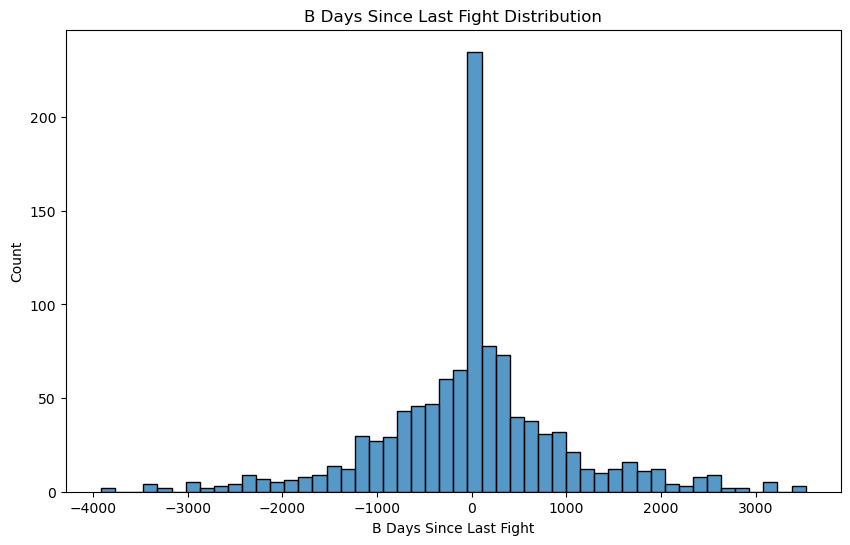

In [183]:
# plot B Days Since Last Fight distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['B Days Since Last Fight'], bins=50)
plt.title('B Days Since Last Fight Distribution')
plt.show()


In [162]:
# import graphviz
# from sklearn.tree import export_graphviz
# from IPython.display import display

# def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
#     if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
#         class_index = decision_tree.tree_.value[node].argmax()
#         class_name = class_names[class_index]
#         explanation.append(f'Then this observation is classified as "{class_name}".')
#         return explanation
#     else:
#         feature = feature_names[decision_tree.tree_.feature[node]]
#         threshold = decision_tree.tree_.threshold[node]
#         if depth == 0:
#             explanation.append(f'If the {feature} <= {threshold:.2f},')
#         else:
#             explanation.append(f'and if the {feature} <= {threshold:.2f},')
#         left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())
#         explanation[-1] = explanation[-1].replace('<=', '>')
#         right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())
#         return left_explanation + right_explanation

# node_explanations = explain_tree(decision_tree_model, feature_names, class_names)

# def my_node_label(node):
#     return node_explanations[node]

# dot_data = export_graphviz(decision_tree_model, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters=True, node_ids=True, label=my_node_label)
# graph = graphviz.Source(dot_data)
# display(graph)



In [163]:
# import graphviz
# from sklearn.tree import _tree

# def build_graph(decision_tree, feature_names, class_names, title, label_0='No', label_1='Yes', node=0, depth=0, parent=None, branch=None):
#     samples = decision_tree.tree_.n_node_samples[node]
#     values = decision_tree.tree_.value[node][0]
#     value_proportions = values / sum(values)
#     gini_impurity = decision_tree.tree_.impurity[node]

#     if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
#         class_index = decision_tree.tree_.value[node].argmax()
#         class_name = class_names[class_index]
#         explanation = f'Then this observation is classified as "{class_name}".'
#     else:
#         feature = feature_names[decision_tree.tree_.feature[node]]
#         threshold = decision_tree.tree_.threshold[node]
#         explanation = f'If the {feature} <= {threshold:.2f},' if depth == 0 else f'and if the {feature} <= {threshold:.2f},'

#     explanation += (f'\n{label_0}: {value_proportions[0]*100:.0f}% | {label_1}: {value_proportions[1]*100:.0f}%'
#                     f'\n({samples} Samples, Gini = {gini_impurity:.2f})')
#     graph.node(str(node), label=explanation, shape='rectangle', fontsize='10')

#     if parent is not None:
#         graph.edge(str(parent), str(node), label=branch)

#     if decision_tree.tree_.children_left[node] != _tree.TREE_LEAF:
#         build_graph(decision_tree, feature_names, class_names, title, label_0, label_1, decision_tree.tree_.children_left[node], depth+1, node, "True")
#         build_graph(decision_tree, feature_names, class_names, title, label_0, label_1, decision_tree.tree_.children_right[node], depth+1, node, "False")

# # Create a new Graphviz graph
# graph = graphviz.Digraph(format='png', graph_attr={'splines': 'ortho', 'ranksep': '0.5'})

# # Specify custom labels for class 0 and class 1
# custom_label_0 = 'Negative'
# custom_label_1 = 'Positive'

# # Specify the title for the graph
# graph_title = 'Decision Tree Visualization: Will Red Fighter Win?'

# # Set the title for the graph
# graph.attr(label=graph_title, labelloc='t', fontsize='16')

# # Call the build_graph function to construct the graph recursively
# build_graph(decision_tree_model, feature_names, class_names, graph_title, custom_label_0, custom_label_1)

# # Display the graph once it has been fully constructed
# display(graph)

### Random Forest Sequential GridSearch

In [164]:
# load random forest model from pickle

with open(model_folder + 'Random_Forest.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [165]:

def random_forest_sequential_gridsearch(model, X, y):

    # Define the grid of hyperparameters
    param_grids = [
        {'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'criterion': ['gini'],
         'min_samples_split': list(range(2, 15)),
         'min_samples_leaf': list(range(1, 15)),
         'bootstrap': [True],
         'max_leaf_nodes': [None] + list(range(2, 6)),
         'min_impurity_decrease': [x / 10 for x in range(4)],
         'n_estimators': [100, 500],
         'n_jobs':[16]}
    ]

    best_params = {}

    counter = 0

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():
        # if the file exists, load it and skip the gridsearch, and test it
        if os.path.isfile(model_folder + 'Random_Forest_Sequential_Gridsearch_part_{counter}.pkl'):
            with open(model_folder + 'Random_Forest_Sequential_Gridsearch_part_{counter}.pkl', 'rb') as f:
                best_estimator = pickle.load(f)
            score_and_save(best_estimator, f'Random_Forest_Sequential_Gridsearch_part_{counter}')
            counter += 1
            continue

        else:

            # Use the list of values for the current hyperparameter
            current_grid = {param_name: param_values}
            # Update the best parameters found so far
            for k, v in best_params.items():
                if k != param_name:
                    current_grid[k] = [v]  # Wrap individual values in a list
            current_grid = {'model__' + k: v for k, v in current_grid.items()}

            # Use GridSearchCV with the current hyperparameter grid
            gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', verbose=3)
            gridsearch.fit(X_train, y_train)
            best_estimator = gridsearch.best_estimator_
            score_and_save(best_estimator, f'Random_Forest_Sequential_Gridsearch_part_{counter}')

            best_param_value = gridsearch.best_params_['model__' + param_name]

            # Update the best parameters dictionary with the best value found for the current hyperparameter
            best_params[param_name] = best_param_value
            print(f'Best {param_name}: {best_param_value}')
            counter += 1
        

    return best_estimator, best_params


In [166]:
# run the gridsearch
best_estimator, best_params = random_forest_sequential_gridsearch(rf_model, X_train, y_train)

final_gridsearched_model = score_and_save(best_estimator, 'Random_Forest_Sequential_Gridsearch')
final_gridsearched_model

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[CV 1/4] END .............model__max_depth=None;, score=0.655 total time=   0.3s
[CV 2/4] END .............model__max_depth=None;, score=0.665 total time=   0.3s
[CV 3/4] END .............model__max_depth=None;, score=0.712 total time=   0.3s
[CV 4/4] END .............model__max_depth=None;, score=0.683 total time=   0.3s
Best max_depth: None
Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4] END model__max_depth=None, model__max_features=auto;, score=0.670 total time=   0.3s
[CV 2/4] END model__max_depth=None, model__max_features=auto;, score=0.631 total time=   0.3s
[CV 3/4] END model__max_depth=None, model__max_features=auto;, score=0.663 total time=   0.3s
[CV 4/4] END model__max_depth=None, model__max_features=auto;, score=0.698 total time=   0.3s
[CV 1/4] END model__max_depth=None, model__max_features=sqrt;, score=0.684 total time=   0.3s
[CV 2/4] END model__max_depth=None, model__max_features=sqrt;, score=0.641 total time=   0.3s
[CV 3/4] END model__max_depth=No

,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,Random_Forest_Sequential_Gridsearch_part_4,0.672,0.023
0,Random_Forest_Sequential_Gridsearch_part_1,0.664,0.005
0,Random_Forest_Sequential_Gridsearch,0.664,0.033
0,Random_Forest,0.661,0.022
0,Random_Forest_Sequential_Gridsearch_part_9,0.660,0.025
0,Random_Forest_Sequential_Gridsearch_part_8,0.657,0.022
0,Random_Forest_Sequential_Gridsearch_part_3,0.650,0.007
0,Extra_Trees,0.650,0.032
0,Random_Forest_Sequential_Gridsearch_part_2,0.650,0.002
0,Random_Forest_Sequential_Gridsearch_part_6,0.646,0.025


In [167]:
# check if the model exists already in models folder
def check_model(model_name):
    if os.path.isfile(model_folder + model_name +'.pkl'):
        print('Model already exists')
        return True
    else:
        return False


if check_model('Random_Forest_1000') == False:
    create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000), 'Random_Forest_1000')
else:
    # load model from pickle
    with open(model_folder + 'Random_Forest_1000.pkl', 'rb') as f:
        rf_1000_model = pickle.load(f)
    # test it
    score_and_save(rf_1000_model, 'Random_Forest_1000')

if check_model('Random_Forest_500') == False:
    create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=500), 'Random_Forest_500')
    # load model from pickle
    with open(model_folder + 'Random_Forest_500.pkl', 'rb') as f:
        rf_500_model = pickle.load(f)
    # test it
    score_and_save(rf_500_model, 'Random_Forest_500')



Model already exists
Model already exists


In [168]:
# load random forest model from pickle

with open(model_folder + 'Random_Forest.pkl', 'rb') as f:
    rf_model = pickle.load(f)


### <a id='toc2_1_2_'></a>[Model 1: XGBoost](#toc0_)

In [169]:
xg_boost = pickle.load(open(model_folder + 'XGBoost.pkl', 'rb'))
keys = xg_boost.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
xg_boost[1].get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)>

In [170]:

def xgboost_sequential_gridsearch(model, X, y):

    # Define the grid of hyperparameters
    param_grids = [
        {'model__max_depth': [None],
         'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
         'model__min_child_weight': list(range(1, 12)),
         'model__gamma': [0, 0.1, 0.15, 0.2, 0.3],
         'model__subsample': [0.7, 0.8, 1.0],
         'model__colsample_bytree': [0.7, 0.8, 1.0],
         'model__n_estimators': [100, 500]}
    ]

    best_params = {}

    counter = 0

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():

        # If the file exists, load it and skip the gridsearch, and test it
        if os.path.isfile(model_folder + 'XGBoost_Sequential_Gridsearch_part_{counter}.pkl'):
            with open(model_folder + 'XGBoost_Sequential_Gridsearch_part_{counter}.pkl', 'rb') as f:
                best_estimator = pickle.load(f)
            score_and_save(best_estimator, 'XGBoost_Sequential_Gridsearch_part_{counter}')
            counter += 1
            continue

        else:
            # Use the list of values for the current hyperparameter
            current_grid = {param_name: param_values}
            # Update the best parameters found so far
            for k, v in best_params.items():
                if k != param_name:
                    current_grid[k] = [v]  # Wrap individual values in a list
            current_grid = {k: v for k, v in current_grid.items()}

            # Use GridSearchCV with the current hyperparameter grid
            gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', verbose=3)
            gridsearch.fit(X, y)
            best_estimator = gridsearch.best_estimator_
            score_and_save(best_estimator, f'XGBoost_Sequential_Gridsearch_part_{counter}')

            best_param_value = gridsearch.best_params_[param_name]

            # Update the best parameters dictionary with the best value found for the current hyperparameter
            best_params[param_name] = best_param_value
            print(f'Best {param_name}: {best_param_value}')
            counter += 1

    return best_estimator, best_params


In [171]:
# run the gridsearch
best_estimator, best_params = xgboost_sequential_gridsearch(xg_boost, X_train, y_train)

final_gridsearched_model = score_and_save(best_estimator, 'XGBoost_Sequential_Gridsearch')
final_gridsearched_model

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END .............model__max_depth=None;, score=0.650 total time=   0.4s
[CV 2/4] END .............model__max_depth=None;, score=0.689 total time=   0.4s
[CV 3/4] END .............model__max_depth=None;, score=0.712 total time=   0.4s
[CV 4/4] END .............model__max_depth=None;, score=0.727 total time=   0.3s
Best model__max_depth: None
Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END model__learning_rate=0.01, model__max_depth=None;, score=0.578 total time=   0.7s
[CV 2/4] END model__learning_rate=0.01, model__max_depth=None;, score=0.626 total time=   0.6s
[CV 3/4] END model__learning_rate=0.01, model__max_depth=None;, score=0.673 total time=   0.6s
[CV 4/4] END model__learning_rate=0.01, model__max_depth=None;, score=0.688 total time=   0.6s
[CV 1/4] END model__learning_rate=0.05, model__max_depth=None;, score=0.621 total time=   0.5s
[CV 2/4] END model__learning_rate=0.05, model__max_dep

,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,Random_Forest_Sequential_Gridsearch_part_4,0.672,0.023
0,Random_Forest_Sequential_Gridsearch_part_1,0.664,0.005
0,Random_Forest_Sequential_Gridsearch,0.664,0.033
0,Random_Forest,0.661,0.022
0,Random_Forest_Sequential_Gridsearch_part_9,0.660,0.025
0,Random_Forest_Sequential_Gridsearch_part_8,0.657,0.022
0,Random_Forest_Sequential_Gridsearch_part_3,0.650,0.007
0,Extra_Trees,0.650,0.032
0,Random_Forest_Sequential_Gridsearch_part_2,0.650,0.002
0,Random_Forest_Sequential_Gridsearch_part_6,0.646,0.025


### <a id='toc2_1_3_'></a>[Extra Trees](#toc0_)

In [172]:
extra_trees = pickle.load(open(model_folder + 'Extra_Trees.pkl', 'rb'))

In [173]:
keys = extra_trees.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
model_keys

['model',
 'model__bootstrap',
 'model__ccp_alpha',
 'model__class_weight',
 'model__criterion',
 'model__max_depth',
 'model__max_features',
 'model__max_leaf_nodes',
 'model__max_samples',
 'model__min_impurity_decrease',
 'model__min_samples_leaf',
 'model__min_samples_split',
 'model__min_weight_fraction_leaf',
 'model__n_estimators',
 'model__n_jobs',
 'model__oob_score',
 'model__random_state',
 'model__verbose',
 'model__warm_start']

In [174]:

def extra_trees_sequential_gridsearch(model, X, y):
    # Define the grid of hyperparameters
    param_grids = [
        {
         'model__max_depth': [None] + list(range(2, 101, 2)),
         'model__max_features': ['auto', 'sqrt'],
         'model__criterion': ['gini', 'entropy'],
         'model__min_samples_split': list(range(2, 12)),
         'model__min_samples_leaf': list(range(1, 12)),
         'model__bootstrap': [True, False],
         'model__max_leaf_nodes': [None] + list(range(2, 6)),
         'model__min_impurity_decrease': [.01, .05, .1, .15, .2],
         'model__n_jobs': [16],
         'model__n_estimators': [100, 500]}
    ]

    best_params = {}
    counter = 0

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():
        # if the file exists, load it and skip the gridsearch, and test it
        if os.path.isfile(model_folder + 'Extra_Trees_Sequential_Gridsearch_part_{counter}.pkl'):
            with open(model_folder + 'Extra_Trees_Sequential_Gridsearch_part_{counter}.pkl', 'rb') as f:
                best_estimator = pickle.load(f)
            score_and_save(best_estimator, f'Extra_Trees_Sequential_Gridsearch_part_{counter}')
            counter += 1
            continue

        else:

            # Use the list of values for the current hyperparameter
            current_grid = {param_name: param_values}
            # Update the best parameters found so far
            for k, v in best_params.items():
                if k != param_name:
                    current_grid[k] = [v]  # Wrap individual values in a list
            current_grid = {k: v for k, v in current_grid.items()}

            # Use GridSearchCV with the current hyperparameter grid
            gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', verbose=3)
            gridsearch.fit(X_train, y_train)
            best_estimator = gridsearch.best_estimator_
            score_and_save(best_estimator, f'Extra_Trees_Sequential_Gridsearch_part_{counter}')

            best_param_value = gridsearch.best_params_[param_name]

            # Update the best parameters dictionary with the best value found for the current hyperparameter
            best_params[param_name] = best_param_value
            print(f'Best {param_name}: {best_param_value}')
            counter += 1

    return best_estimator, best_params


In [175]:
# Run the grid search
best_estimator, best_params = extra_trees_sequential_gridsearch(extra_trees, X_train, y_train)

final_gridsearched_model = score_and_save(best_estimator, 'Extra_Trees_Sequential_Gridsearch')
final_gridsearched_model.head()

Fitting 4 folds for each of 51 candidates, totalling 204 fits
[CV 1/4] END .............model__max_depth=None;, score=0.655 total time=   0.1s
[CV 2/4] END .............model__max_depth=None;, score=0.641 total time=   0.1s
[CV 3/4] END .............model__max_depth=None;, score=0.698 total time=   0.1s
[CV 4/4] END .............model__max_depth=None;, score=0.649 total time=   0.1s
[CV 1/4] END ................model__max_depth=2;, score=0.631 total time=   0.1s
[CV 2/4] END ................model__max_depth=2;, score=0.646 total time=   0.1s
[CV 3/4] END ................model__max_depth=2;, score=0.702 total time=   0.1s
[CV 4/4] END ................model__max_depth=2;, score=0.698 total time=   0.1s
[CV 1/4] END ................model__max_depth=4;, score=0.641 total time=   0.1s
[CV 2/4] END ................model__max_depth=4;, score=0.650 total time=   0.1s
[CV 3/4] END ................model__max_depth=4;, score=0.702 total time=   0.1s
[CV 4/4] END ................model__max_depth=4

,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,Random_Forest_Sequential_Gridsearch_part_4,0.672,0.023
0,Extra_Trees_Sequential_Gridsearch_part_1,0.668,0.036
0,Extra_Trees_Sequential_Gridsearch_part_4,0.668,0.023
0,Extra_Trees_Sequential_Gridsearch_part_0,0.668,0.029
0,Random_Forest_Sequential_Gridsearch_part_1,0.664,0.005


#### <a id='toc2_1_3_1_'></a>[Best Model](#toc0_)


In [176]:
# pick the top model in saved models
top_model = model_summary2.iloc[0, 0]
top_model

'Random_Forest_Sequential_Gridsearch_part_4'

In [177]:
best_model = pickle.load(open(model_folder + ''+top_model+'.pkl', 'rb'))

In [178]:
best_model['model'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [179]:
cat_list= list(feature_names_categorical)

In [180]:
all_cats = cat_list + numerical_columns
print(len(all_cats))

428


In [181]:
# what values are in all_cats that are not in all_initial_cats?
set(all_cats) - set(all_initial_cats)

{'A Affiliation Cluster', 'B Affiliation Cluster'}

In [182]:
f_imp = best_model.steps[1][1].feature_importances_
f_imp_df = pd.DataFrame(f_imp, index = all_cats, columns = ['Importance'])
f_imp_df = f_imp_df.sort_values('Importance', ascending = False)
best_f_imp_df = f_imp_df.round(3)
best_f_imp_df

ValueError: Shape of passed values is (426, 1), indices imply (428, 1)

In [ ]:
best_f_imp_df[:50]

In [ ]:
best_f_imp_df[50:100]

In [ ]:
best_model['model'].get_params()

## Best Model (Usually) Important Features

The last model is typically the best model. Lets look at the most important features. 

We can see Afiliation is important, so we can make remove it from the list as the categorical nature of it takes too many items

In [ ]:
# drop all rows with "Affiliation" in it
best_f_imp_df = best_f_imp_df[~best_f_imp_df.index.str.contains('Affiliation')]
# drop all rows with "Martial_Art" in it
best_f_imp_df = best_f_imp_df[~best_f_imp_df.index.str.contains('Martial_Art')]
best_f_imp_df.head(50)

In [ ]:
stophere

## XGBoost Randomized Search

In [ ]:
from scipy.stats import uniform, randint
import xgboost as xgb

In [ ]:
def create_fullpipe_v2(preprocessing, base_model, model_name, param_distributions, n_iter=100):
    # Create a full pipeline with preprocessing and the base model
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', base_model)])

    # Setup randomized search
    random_search = RandomizedSearchCV(
        fullpipe, param_distributions=param_distributions, n_iter=n_iter, 
        scoring='accuracy', cv=3, verbose=3, random_state=42, n_jobs=-1)

    # Fit model with randomized search
    random_search.fit(X_train, y_train)

    # Best pipeline after randomized search
    best_pipeline = random_search.best_estimator_

    # Evaluate on test data
    cv = cross_val_score(best_pipeline, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()

    # save result
    res = save_result(cv_mean, cv_std, model_name)

    # pickle the best model
    pickle.dump(best_pipeline, open(model_folder + f'{model_name}.pkl', 'wb'))
    
    return res, best_pipeline


In [ ]:
param_distributions = {
    'model__n_estimators': randint(50, 200),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'model__colsample_bytree': uniform(0.7, 0.3),
    'model__subsample': uniform(0.7, 0.3)
}

In [ ]:
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model_name = "xgboost_random_search_2"

result, best_pipeline = create_fullpipe_v2(preprocessing, base_model, model_name, param_distributions, n_iter=100)

In [ ]:
result.head()

In [ ]:
best_pipeline

In [ ]:
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model_name = "xgboost_random_search_3"

result, best_pipeline = create_fullpipe_v2(preprocessing, base_model, model_name, param_distributions, n_iter=100)

In [ ]:
result.head()

In [ ]:
best_pipeline

## Extra Trees Randomized Search

In [ ]:
param_distributions = {
    'model__n_estimators': [100, 1000],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [None, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 30],
    'model__min_samples_split': [2, 4, 5, 7, 8, 7, 10, 12, 15],
    'model__min_samples_leaf': [1, 2, 4, 6, 8, 13, 15],
}

In [ ]:
# run extra trees gridsearch
base_model = ExtraTreesClassifier()
model_name = "extra_trees_Random_Search_2"

result, best_pipeline = create_fullpipe_v2(preprocessing, base_model, model_name, param_distributions, n_iter=100)

In [ ]:
result.head()

In [ ]:
best_pipeline

## Gradient Boosting Classifier

In [ ]:
param_distributions = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    'model__max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__subsample': np.linspace(0.5, 1.0, 6),
    'model__min_samples_split': [2, 3, 4],
    'model__min_samples_leaf': [1, 2, 3]
}

base_model = GradientBoostingClassifier()

model_name = "gradient_boosting_random_search"
res = create_fullpipe_v2(preprocessing, base_model, model_name, param_distributions, n_iter=20)


In [ ]:
res.head()

## LDA

In [ ]:
param_distributions = {
    'model__solver': ['svd', 'lsqr', 'eigen'],
    'model__shrinkage': [None, 'auto', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # effective only if solver is 'lsqr' or 'eigen'
    'model__tol': [1e-4, 1e-3, 1e-2, 1e-1, 1]
}

base_model = LinearDiscriminantAnalysis()
model_name = "linear_discriminant_analysis_random_search"
res = create_fullpipe_v2(preprocessing, base_model, model_name, param_distributions, n_iter=100)

In [ ]:
res

## LDA SearchCV

In [ ]:
def create_fullpipe_gridsearch(preprocessing, base_model, model_name, param_grid):
    # Create a full pipeline with preprocessing and the base model
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', base_model)])

    # Setup grid search
    grid_search = GridSearchCV(
        fullpipe, param_grid=param_grid, 
        scoring='accuracy', cv=3, verbose=3, n_jobs=-1)

    # Fit model with grid search
    grid_search.fit(X_train, y_train)

    # Best pipeline after grid search
    best_pipeline = grid_search.best_estimator_

    # Evaluate on test data
    cv = cross_val_score(best_pipeline, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()

    # save result
    res = save_result(cv_mean, cv_std, model_name)

    # pickle the best model
    pickle.dump(best_pipeline, open(model_folder + f'{model_name}.pkl', 'wb'))
    
    return res, best_pipeline

In [ ]:
# LDA Param Grid
params= {
    'model__solver': ['svd', 'lsqr', 'eigen'],
    'model__shrinkage': [None, 'auto', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  # effective only if solver is 'lsqr' or 'eigen'
    'model__tol': [1e-4, 1e-3, 1e-2, 1e-1, 1]
}

base_model = LinearDiscriminantAnalysis()
model_name = "linear_discriminant_analysis_grid_search"
res, best_model = create_fullpipe_gridsearch(preprocessing, base_model, model_name, params)

In [ ]:
res

In [ ]:
print(best_model)

For LDA, "tol" is only necessary when using "eigen", so I will do another version going over those options

In [ ]:
# LDA Param Grid
params= {
    'model__solver': ['eigen'],
    'model__shrinkage': [None, 'auto', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # effective only if solver is 'lsqr' or 'eigen'
    'model__tol': [1e-4, 1e-3, 1e-2, 1e-1, 1]
}

base_model = LinearDiscriminantAnalysis()
model_name = "linear_discriminant_analysis_grid_search_eigen"
res, best_model = create_fullpipe_gridsearch(preprocessing, base_model, model_name, params)

In [ ]:
res.head()

In [ ]:
best_model

In [ ]:
coefficients = best_model['model'].coef_[0]
coefficients

In [ ]:
all_cats = cat_list + numerical_columns
f_imp = coefficients
f_imp_df = pd.DataFrame(f_imp, index = all_cats, columns = ['Importance'])
f_imp_df = f_imp_df.sort_values('Importance', ascending = False)
f_imp_df = f_imp_df.round(3)
f_imp_df

In [ ]:
f_imp_df[:50]

# Final Model

- Forest / Tree Models are a little more explainable, so choose one of those if they are equivalent

In [ ]:
res.head()

res.head()